In [1]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
%matplotlib inline

In [2]:
def keygen(x,r,size):
    key=[]
    for i in range(size):
        x = r*x*(1-x)
        key.append(int((x*pow(10,16))%256))
        
    return key

In [3]:
def subimage(img,r):
    h = img.shape[0]
    w = img.shape[1]
    z = 0
    key = keygen(0.01,r,h*w)
    enimg = np.zeros(shape = [h,w,3],dtype = np.uint8)
    for i in range(h):
        for j in range(w):
            enimg[i,j] = img[i,j]^key[z] #pixel value xor with key value
            z+=1
    return enimg

In [4]:
def desubimage(enimg,r):
    h = img.shape[0]
    w = img.shape[1]
    z = 0
    key = keygen(0.01,r,h*w)    
    decimg = np.zeros(shape = [h,w,3],dtype= np.uint8)
    for i in range(h):
        for j in range(w):
            decimg[i,j] = enimg[i,j]^key[z]
            z+=1
    return decimg

In [5]:
def indexgen(x,r,n):
    index = []
    k = []
    for i in range(n):
        x = r*x*(1-x)
        k.append(x)
        index.append(i)
    # below the chaotic keys keys are arranget in ascending order which scrambles index positions
    for i in range(n):
        for j in range(n): 
            if(k[i]>k[j]):
                k[i],k[j] = k[j],k[i]
                index[i] , index[j] = index[j],index[i]
    return index

In [6]:
def shuffleimage(img,index,x,y):
    ecrimg = np.zeros(shape = [x,y,3],dtype = np.uint8)
    for i in range(x):
        k = 0
        for j in range(y):
            try:
                ecrimg[i][j] = img[i][index[k]]
                k+=1
            except:
                pass
    return ecrimg

In [22]:
def final_shuffle(img,r):
    h = img.shape[0]
    w = img.shape[1]
    eimg = np.zeros(shape = [w,h],dtype = np.uint8)
    #shuffling pixels column wise
    key = indexgen(0.1,r,h)
    eimg = shuffleimage(img,key,w,h)
    #shuffling pixels row wise
    key = indexgen(0.1,r,w)
    eimg = shuffleimage(img,key,h,w)
    return eimg

In [24]:
def deshuffle(img,index,x,y):
    dimg = np.zeros(shape = [x,y,3],dtype = np.uint8)
    for i in range(x):
        k=0
        for j in range(y):
            try:
                dimg[i][index[k]] = img[i][j]
                k=k+1
            except:
                pass
    return dimg

In [27]:
key = indexgen(0.1,3.995,w)
ecrimg2 = deshuffle(eimg,key,w,h)

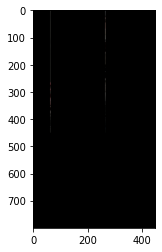

In [28]:
plt.imshow(ecrimg2)

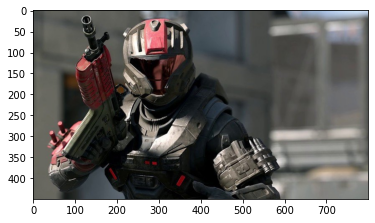

In [8]:
img = cv2.imread('b.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
h = img.shape[0]
w = img.shape[1]

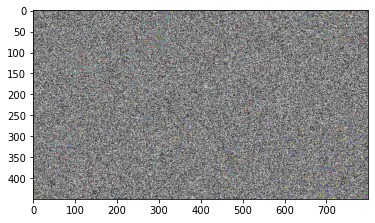

In [10]:
enimg = subimage(img,3.995)
plt.imshow(enimg)

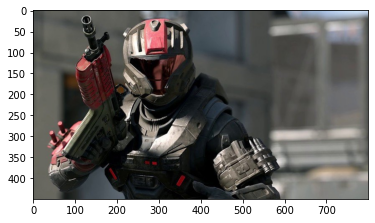

In [11]:
decimg=desubimage(enimg,3.995)
plt.imshow(decimg)

## Shuffling function

In [25]:
eimg = final_shuffle(img,3.995)

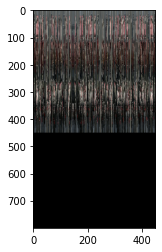

In [26]:
plt.imshow(eimg)

In [ ]:
h = img.shape[0]
w = img.shape[1]
ecrimg = np.zeros(shape = [h,w,3],dtype = np.uint8)

key = indexgen(0.1,3.995,w)
ecrimg = shuffleimg(img,key,h,w)
plt.imshow(ecrimg)
plt.show()

#deshuffling
ecrimg1 = np.zeros(shape = [h,w],dtype = np.uint8)
key = indexgen(0.1,3.995,w)
ecrimg1 = deshuffleimg(ecrimg,key,h,w)
plt.imshow(ecrimg1)
plt.show()